<a href="https://colab.research.google.com/github/Gaurav1401/Innomatics_Internship_APR_21/blob/main/Task%20-%2011%20(EDA%20Missing%20Value%20Outlier%20ML%20Model)/Task_11_Bivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_3 = pd.read_csv('https://raw.githubusercontent.com/Gaurav1401/Innomatics_Internship_APR_21/main/Task%20-%2011%20(EDA%20%2B%20Missing%20Value%20%2B%20Outlier%20%2B%20ML%20Model)/df_3.csv')

In [ ]:
df_3.head()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,9th-12th,4,Unmarried,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,5,Married,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,8,Married,Protective-serv,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,6,Married,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
4,5,34,Private,198693,9th-12th,4,Unmarried,Other-service,White,Male,0,0,30,United-States,<=50K


In [ ]:
df_3 = df_3.drop('Unnamed: 0', axis = 'columns')

In [ ]:
fig = ff.create_distplot([df_3['fnlwgt']],group_labels =['fnlwgt_density'], colors = ['#AAFF00'])

fig.add_trace(go.Box(x = df_3['fnlwgt'],
                    xaxis='x2', yaxis='y2', 
                     name = 'fnlwgt_distribution'
                    ))

fig.update_layout(
    title_text = 'Checking density and distribution of the fnlwgt column',
    margin = {'t':50, 'b':10},
    template= "plotly_dark"
)

fig.update_xaxes(type="log")
fig.show(renderer="colab")

In [ ]:
fig = px.strip(df_3, x="age", y="gender", color="income", facet_col="native-country")
fig.show(renderer="colab")

<font color = blue>**The overall distribution looks the same it doesn't look like income dependso on country and gender**</font>

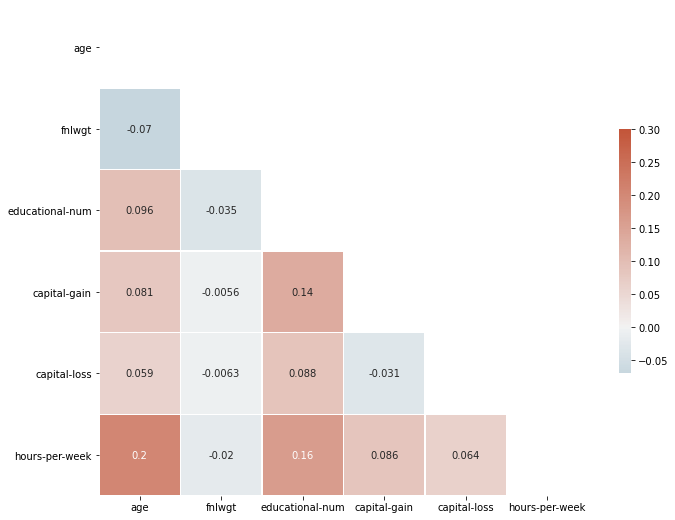

In [ ]:
mask = np.triu(np.ones_like(df_3.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_3.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.show()